In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv('AirlineRevenueRegr.csv')

In [3]:
df.head()

,Cust_type,Cabin_Type,Carrier_Type,Haul_type,Route_Type,Num_Tickets,Net_sales
0,1,1,1,1,1,0,153
1,1,1,1,1,1,1,159
2,1,1,1,1,1,1,"1,173"
3,1,1,1,1,1,0,621
4,1,1,1,1,1,1,402


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7513 entries, 0 to 7512
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Cust_type     7513 non-null   int64 
 1   Cabin_Type    7513 non-null   int64 
 2   Carrier_Type  7513 non-null   int64 
 3   Haul_type     7513 non-null   int64 
 4   Route_Type    7513 non-null   int64 
 5   Num_Tickets   7513 non-null   object
 6   Net_sales     7513 non-null   object
dtypes: int64(5), object(2)
memory usage: 411.0+ KB


In [5]:
def convert_column_to_int(data, column):
    """
    Convert a column containing numbers represented as strings with commas to integers.
    
    Parameters:
        data (DataFrame): The input DataFrame.
        column (str): The name of the column to be converted.
    
    Returns:
        DataFrame: The DataFrame with the specified column converted to integers.
    """
    # Remove commas and convert to integers
    data[column] = data[column].astype(str).str.replace(',', '').astype(int)
    
    return data

In [6]:
df = convert_column_to_int(df, 'Num_Tickets')
df = convert_column_to_int(df, 'Net_sales')

In [7]:
def remove_outliers_iqr(df):
    """
    Remove outliers from numerical columns in a DataFrame using the Interquartile Range (IQR) method.
    
    Parameters:
        df (DataFrame): Input DataFrame.
    
    Returns:
        DataFrame: DataFrame with outliers removed.
    """
    # Copy the input DataFrame to avoid modifying the original DataFrame
    df_cleaned = df.copy()
    
    # Counter to keep track of the number of data points removed
    num_removed = 0
    
    # Iterate over numerical columns
    for column in df_cleaned.select_dtypes(include='number').columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        q1 = df_cleaned[column].quantile(0.25)
        q3 = df_cleaned[column].quantile(0.75)
        
        # Calculate IQR (Interquartile Range)
        iqr = q3 - q1
        
        # Define the lower and upper bounds for outliers
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # Count outliers and replace with NaN
        outliers = (df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)
        num_removed += outliers.sum()
        df_cleaned.loc[outliers, column] = np.nan
    
    # Drop rows containing NaN values (outliers)
    df_cleaned = df_cleaned.dropna()
    
    # Print the number of data points removed
    print(f"Number of data points removed: {num_removed}")
    
    return df_cleaned


In [8]:
def build_linear_regression_model(data, target_column):
    """
    Build a linear regression model based on the input DataFrame and target column.
    
    Parameters:
        data (DataFrame): The input DataFrame.
        target_column (str): The name of the target column.
    
    Returns:
        dict: A dictionary containing train score, test score, mean squared error, model coefficients, and the scatter plot.
    """
    # Extract features and target
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the linear regression model
    model = LinearRegression()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate train and test scores
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    # Calculate mean squared error
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    
    # Get model coefficients
    coefficients = model.coef_
    
    # Create dictionary to store results
    results = {
        'train_score': train_score,
        'test_score': test_score,
        'mse_train': mse_train,
        'mse_test': mse_test,
        'coefficients': coefficients
    }
    
    # Plot actual vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred_test)
    plt.plot(y_test, y_test, color='red', linestyle='--')  # Plot the diagonal line
    plt.title('Actual vs Predicted')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)
    plt.show()
    
    return results



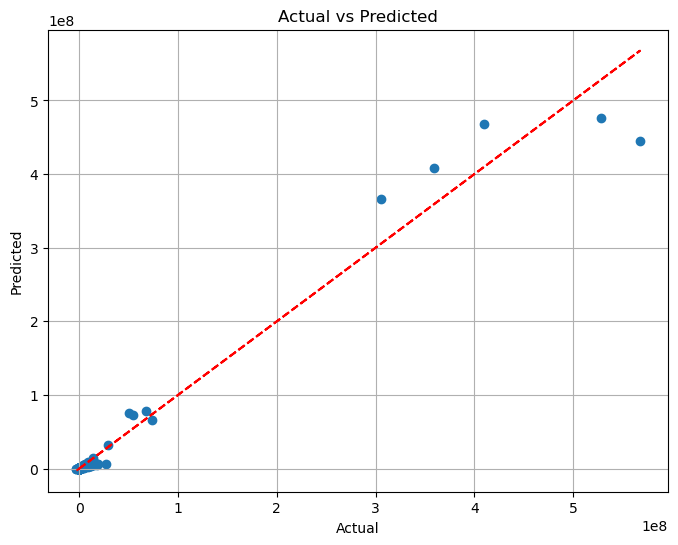

{'train_score': 0.9755088998046194,
 'test_score': 0.9697506688142374,
 'mse_train': 8595536059692.308,
 'mse_test': 20261982646373.77,
 'coefficients': array([-3.70062482e+05,  3.88579753e+04,  2.74957305e+04,  8.87288345e+04,
        -4.14962274e+04,  3.30486484e+02])}

In [9]:
build_linear_regression_model(df, "Net_sales")

In [10]:
df = remove_outliers_iqr(df)

Number of data points removed: 2626


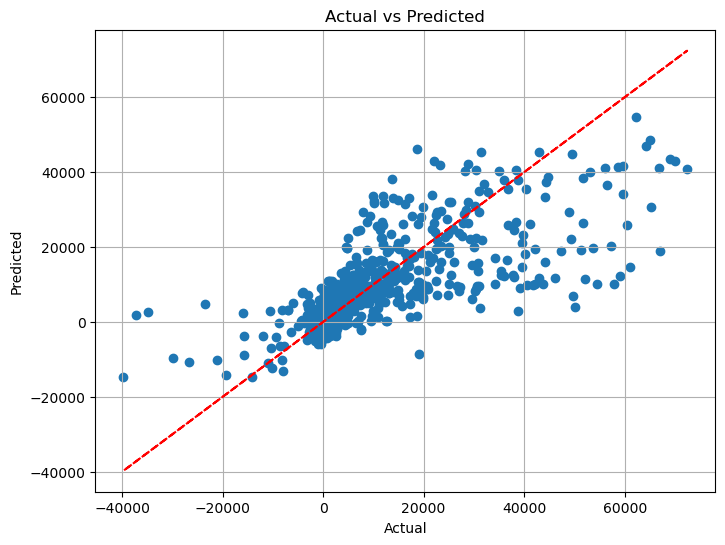

{'train_score': 0.5574413526231834,
 'test_score': 0.5567361950116083,
 'mse_train': 78558230.88039577,
 'mse_test': 75767761.3041604,
 'coefficients': array([-1723.33165852,  2768.31026943,  1792.87215319,  4588.59925008,
        -2473.84675587,   424.839201  ])}

In [11]:
build_linear_regression_model(df, "Net_sales")